In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [2]:
data = pd.read_csv("../data/crabs.csv") 
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4

In [3]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,4:9].values

In [4]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [5]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)

In [6]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [7]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [8]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [9]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         4.927573        -0.268445
1         4.386176        -0.094074

In [10]:
# Constitution de la matrice finale avec la variable qualitative sp
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 sp
0         4.927573        -0.268445  B
1         4.386176        -0.094074  B

In [11]:
import matplotlib.pyplot as plt

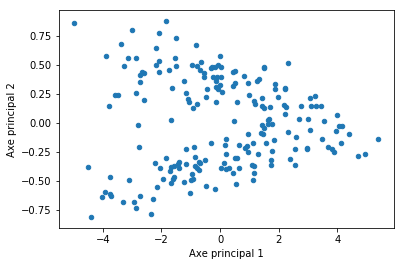

In [12]:
# Première représentation graphique sans distinction des variables qualitatives
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

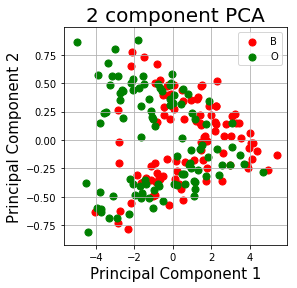

In [13]:
# Visualisation de la matrice avec prise en compte de la variable qualitative sp
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B','O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['sp'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
# Constitution de la matrice finale avec la variable qualitative sp
# axis : {0/’index’, 1/’columns’}, default 0

finaldf2 = pd.concat([principaldf, data[['sex']]], axis = 1)
finaldf2.head(2)

Axe principal 1  Axe principal 2 sex
0         4.927573        -0.268445   M
1         4.386176        -0.094074   M

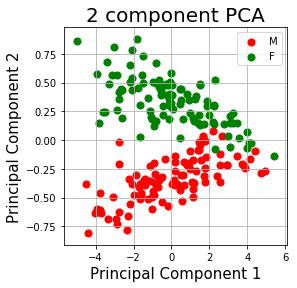

In [15]:
# Visualisation de la matrice avec prise en compte de la variable qualitative sex
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M','F']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf2['sex'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.95776696, 0.03033704])

In [17]:
#Création de la colonne CAT qui permet de croiser les deux variables qualitatives sp et sex
data['CAT'] = np.where((data.sex=='F') & (data.sp =='O'), 'FO', (np.where((data.sex=='F') & (data.sp =='B'),'FB',(np.where((data.sex=='M') & (data.sp =='B'),'MB',(np.where((data.sex=='M') & (data.sp =='O'),'MO','N')))))))

In [18]:
#Verifions sa création
data.head(2)

Unnamed: 0 sp sex  index   FL   RW    CL    CW   BD CAT
0           1  B   M      1  8.1  6.7  16.1  19.0  7.0  MB
1           2  B   M      2  8.8  7.7  18.1  20.8  7.4  MB

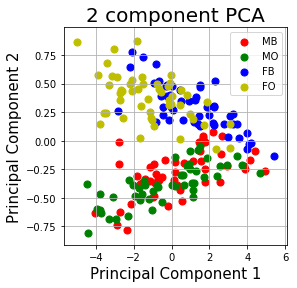

In [19]:
# Visualisation de la matrice avec prise en compte des deux variables qualitatives sp et sex
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['MB','MO','FB','FO']
colors = ['r', 'g','b','y']
for target, color in zip(targets,colors):
    indicesToKeep = data['CAT'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Utilisation de sklearn pour l'étude des variables et individus

In [20]:
import sklearn

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()

In [23]:
#On standardise les données
Z2 = sc.fit_transform(x)

In [24]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

5


In [25]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.78883478e+00 1.51685207e-01 4.66329741e-02 1.11353571e-02
 1.71167766e-03]


In [26]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.9577669568722968, 0.030337041349040424, 0.009326594818043316, 0.0022270714294888366, 0.00034233553113074776]


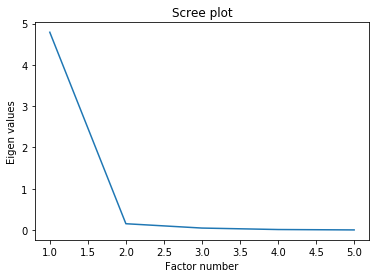

In [27]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

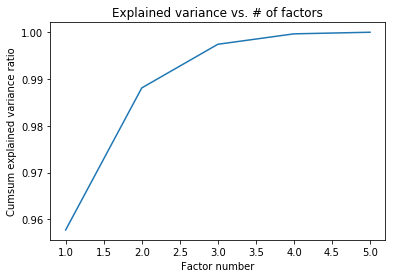

In [28]:
#cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [29]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [30]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.788835  2.283333
1    0.151685  1.283333
2    0.046633  0.783333
3    0.011135  0.450000
4    0.001712  0.200000


__Représentation des individus__

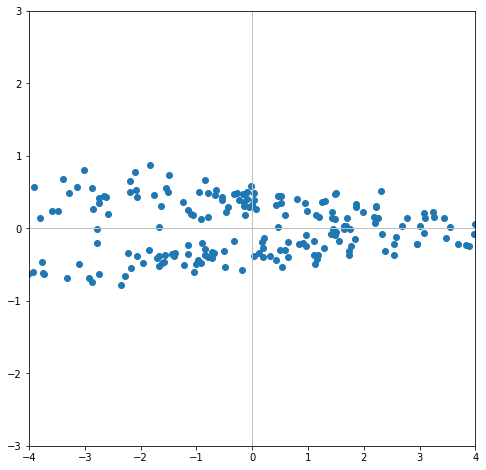

In [31]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
#for i in range(200):
     #plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
    #Vous pouvez activer les étiquettes mais ça reste encombrant
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [71]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0  24.374345
1      1  19.248972
2      2  17.078416
3      3  15.144076
4      4  14.754059
5      5   8.775067
6      6   7.184689
7      7   6.632492
8      8   6.722057
9      9   4.896803
10    10   3.185401
11    11   2.888168
12    12   3.208447
13    13   3.277417
14    14   2.767866
15    15   2.695187
16    16   2.565223
17    17   2.255230
18    18   2.117235
19    19   1.284531
20    20   0.510247
21    21   0.403742
22    22   0.609926
23    23   0.302099
24    24   0.163640
25    25   0.091893
26    26   0.187288
27    27   0.538456
28    28   0.182322
29    29   0.395765
..   ...        ...
170  170   1.161714
171  171   1.275769
172  172   0.965113
173  173   0.909866
174  174   1.716369
175  175   4.635656
176  176   2.753869
177  177   2.560309
178  178   3.284042
179  179   2.772654
180  180   1.578286
181  181   2.878025
182  182   4.226959
183  183   4.494037
184  184   5.089765
185  185   7.307939
186  186   7.043088
187  187   9.743942


In [43]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.996169  0.002957
1      1  0.999458  0.000460
2      2  0.998094  0.001670
3      3  0.995966  0.003996
4      4  0.996334  0.003406
5      5  0.993718  0.005517
6      6  0.998520  0.000212
7      7  0.979200  0.019909
8      8  0.994212  0.002038
9      9  0.993671  0.001280
10    10  0.970865  0.000033
11    11  0.981753  0.000506
12    12  0.946706  0.040864
13    13  0.962113  0.018274
14    14  0.983927  0.000024
15    15  0.998612  0.000298
16    16  0.954031  0.011751
17    17  0.965770  0.003608
18    18  0.980726  0.000102
19    19  0.960474  0.024150
20    20  0.792388  0.073242
21    21  0.447245  0.459796
22    22  0.474066  0.458855
23    23  0.324213  0.493560
24    24  0.249278  0.445608
25    25  0.369127  0.388293
26    26  0.073893  0.641409
27    27  0.488891  0.188184
28    28  0.564317  0.154474
29    29  0.084285  0.823281
..   ...       ...       ...
170  170  0.952718  0.029638
171  171  0.926279  0.032427
172  172  0.65

In [44]:
#contributions aux axes
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(200*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.025352  0.002375
1      1  0.020087  0.000292
2      2  0.017798  0.000940
3      3  0.015748  0.001995
4      4  0.015348  0.001656
5      5  0.009104  0.001596
6      6  0.007490  0.000050
7      7  0.006781  0.004353
8      8  0.006978  0.000452
9      9  0.005080  0.000207
10    10  0.003229  0.000003
11    11  0.002960  0.000048
12    12  0.003171  0.004322
13    13  0.003292  0.001974
14    14  0.002843  0.000002
15    15  0.002810  0.000027
16    16  0.002555  0.000994
17    17  0.002274  0.000268
18    18  0.002168  0.000007
19    19  0.001288  0.001023
20    20  0.000422  0.001232
21    21  0.000189  0.006119
22    22  0.000302  0.009225
23    23  0.000102  0.004915
24    24  0.000043  0.002404
25    25  0.000035  0.001176
26    26  0.000014  0.003960
27    27  0.000275  0.003340
28    28  0.000107  0.000928
29    29  0.000035  0.010740
..   ...       ...       ...
170  170  0.001156  0.001135
171  171  0.001234  0.001364
172  172  0.00

__Représentation des variables__

In [72]:
#le champ components_ de l'objet ACP (les vecteurs propres)
print(acp.components_)

[[-0.45204368 -0.42807736 -0.45319102 -0.45111272 -0.45113358]
 [-0.13758126  0.89813071 -0.26823815 -0.18059588 -0.26432187]
 [-0.53076841  0.01197915  0.30968155  0.65256956 -0.44316103]
 [ 0.69692337 -0.0837032  -0.00144463  0.08918782 -0.70663642]
 [ 0.09649156 -0.05441759 -0.79168267  0.57452672  0.17574331]]


In [46]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [47]:
#corrélation des variables avec les axes
corvar = np.zeros((5,5))
for k in range(5):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-9.89225553e-01 -5.35834770e-02 -1.14617683e-01  7.35422825e-02
   3.99208978e-03]
 [-9.36779085e-01  3.49793038e-01  2.58685744e-03 -8.83271371e-03
  -2.25138779e-03]
 [-9.91736320e-01 -1.04470135e-01  6.68747067e-02 -1.52443702e-04
  -3.27538329e-02]
 [-9.87188293e-01 -7.03362873e-02  1.40920239e-01  9.41147313e-03
   2.37695642e-02]
 [-9.87233956e-01 -1.02944869e-01 -9.56991586e-02 -7.45672444e-02
   7.27092696e-03]]


In [74]:
#Afin de récupérer les noms de variables quantitatives (FL,RW,CL,CW et BD)
D=data[data.columns[4:9]]

In [75]:
#on affiche les corrélation variables-axes pour les deux premiers axes
print(pd.DataFrame({'id':D.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

   id     COR_1     COR_2
0  FL -0.989226 -0.053583
1  RW -0.936779  0.349793
2  CL -0.991736 -0.104470
3  CW -0.987188 -0.070336
4  BD -0.987234 -0.102945


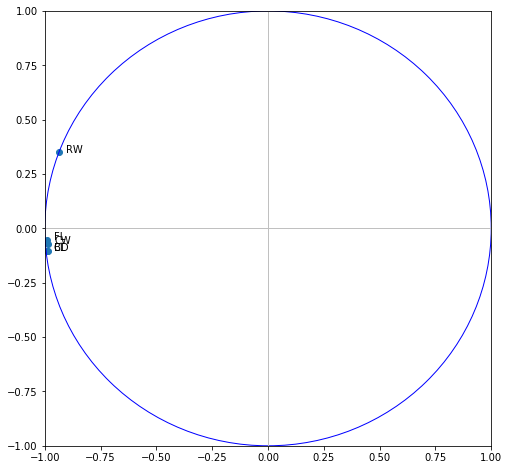

In [65]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(5):
     plt.annotate(D.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [66]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':D.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

   id    COS2_1    COS2_2
0  FL  0.978567  0.002871
1  RW  0.877555  0.122355
2  CL  0.983541  0.010914
3  CW  0.974541  0.004947
4  BD  0.974631  0.010598
